In [ ]:
import os
import nltk
import copy
import h5py
import random
import regex as re
import string
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk import ngrams
from nltk.corpus import words
from nltk.corpus import stopwords
from collections import Counter
from collections import OrderedDict
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

nltk.download('stopwords')
all_stopwords = stopwords.words('english')

In [ ]:
## Loading previously preprocessed corpus as a list of words

%%time
all_words_bi = pickle.load(open('all_words_bi','rb'))

CPU times: total: 36 s
Wall time: 50.7 s


In [ ]:
all_words_bi[:10]

['bgnsntnc',
 'according',
 'to',
 'current',
 'live',
 'statistics',
 'at',
 'the',
 'time',
 'of']

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
## Stemming all words to get only root words since our goal is to only check similarity between words

%%time
all_words_bi_stem = [ps.stem(w) for w in all_words_bi]

CPU times: total: 53min 34s
Wall time: 54min 15s


In [ ]:
# pickle.dump(all_words_bi_stem,open('all_words_bi_stem','wb'))

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
## Lemmatizing all words to get contracted words since our goal is to only check similarity between words

%%time
all_words_bi_stem_lem = [lemmatizer.lemmatize(w) for w in all_words_bi_stem]

CPU times: total: 14min 6s
Wall time: 17min 1s


In [ ]:
# pickle.dump(all_words_bi_stem_lem,open('all_words_bi_stem_lem','wb'))

In [ ]:
all_words_bi_stem_lem[:10]

['bgnsntnc',
 'accord',
 'to',
 'current',
 'live',
 'statist',
 'at',
 'the',
 'time',
 'of']

In [ ]:
%%time
all_words_clean = [w for w in all_words_bi_stem_lem if w not in ['bgnsntnc','endsntnc']]

CPU times: total: 45 s
Wall time: 1min 30s


In [ ]:
# pickle.dump(all_words_clean,open('all_words_clean','wb'))

In [ ]:
all_words_clean[:10]

['accord',
 'to',
 'current',
 'live',
 'statist',
 'at',
 'the',
 'time',
 'of',
 'edit']

In [ ]:
## Creating vocabulary

%%time
vocabulary = Counter(all_words_clean)

CPU times: total: 46.3 s
Wall time: 1min 42s


In [ ]:
%%time
vocab_freq = OrderedDict(vocabulary.most_common())

CPU times: total: 1min 30s
Wall time: 3min 19s


In [ ]:
# %%time
# pickle.dump(vocab_freq,open('vocab_freq','wb'))

CPU times: total: 797 ms
Wall time: 879 ms


In [ ]:
%%time
vocab_freq = pickle.load(open('vocab_freq','rb'))

CPU times: total: 469 ms
Wall time: 476 ms


In [ ]:
len(vocab_freq)

1163011

In [ ]:
## Since the vocabulary consists of more than 11 lakh words, we analyze the frequency of words to remove words to get a smaller vocabulary

frequencies = np.array(list(vocab_freq.values()))
frequencies[:100]

array([10403671,  7018860,  5887379,  4689042,  4466119,  4038197,
        1968685,  1943795,  1871582,  1503290,  1226751,  1175797,
        1135868,  1084954,  1023726,   933368,   932637,   882325,
         877489,   838102,   753900,   701257,   676534,   650679,
         635389,   632150,   612529,   597304,   594384,   594062,
         536573,   530686,   528803,   477842,   461348,   423442,
         410012,   403541,   386567,   376884,   375814,   364106,
         360551,   350654,   347025,   343209,   338935,   331637,
         324004,   321311,   318439,   306368,   305401,   305224,
         302052,   300512,   292664,   286377,   284063,   284042,
         283003,   282224,   277938,   277183,   271825,   269702,
         265571,   258123,   257583,   255074,   241328,   238648,
         237699,   237529,   236560,   235528,   235076,   234347,
         231405,   231329,   229301,   228099,   227123,   226234,
         224867,   223439,   219302,   214178,   213559,   210

In [ ]:
(frequencies/sum(frequencies))[:100]

array([0.05673096, 0.03827367, 0.03210373, 0.02556923, 0.02435364,
       0.02202019, 0.01073519, 0.01059947, 0.01020569, 0.0081974 ,
       0.00668944, 0.00641159, 0.00619386, 0.00591623, 0.00558235,
       0.00508963, 0.00508565, 0.0048113 , 0.00478493, 0.00457015,
       0.004111  , 0.00382394, 0.00368912, 0.00354814, 0.00346476,
       0.0034471 , 0.00334011, 0.00325708, 0.00324116, 0.00323941,
       0.00292592, 0.00289382, 0.00288355, 0.00260566, 0.00251572,
       0.00230902, 0.00223579, 0.0022005 , 0.00210794, 0.00205514,
       0.0020493 , 0.00198546, 0.00196608, 0.00191211, 0.00189232,
       0.00187151, 0.0018482 , 0.00180841, 0.00176679, 0.0017521 ,
       0.00173644, 0.00167062, 0.00166534, 0.00166438, 0.00164708,
       0.00163868, 0.00159589, 0.00156161, 0.00154899, 0.00154887,
       0.00154321, 0.00153896, 0.00151559, 0.00151147, 0.00148226,
       0.00147068, 0.00144815, 0.00140754, 0.00140459, 0.00139091,
       0.00131596, 0.00130134, 0.00129617, 0.00129524, 0.00128

In [ ]:
sum((frequencies/sum(frequencies))[:100])

0.4399200216452588

In [ ]:
sum((frequencies/sum(frequencies))[-1:-1000000:-1])

0.010209933120449106

In [ ]:
## It is evident that even just the first 100 words account for more than 40 percent of the corpus, while the last 10 lakh words only contribute to 1 percent.
## So, the frequency distrubution is heavily left skewed with a long tail on the left
## Hence, we remove the long tail to get a smaller vocabulary

vocab_15k = np.array([list(vocab_freq.keys())[:15000],list(vocab_freq.values())[:15000]]).T

In [ ]:
vocab_14k = np.array([w for w in vocab_15k if not w[0] in all_stopwords and len(w[0])>2])

In [ ]:
len(vocab_14k)

14310

In [ ]:
vocab_14k.T[0][:10]

array(['thi', 'use', 'patient', 'cell', 'infect', 'studi', 'also', 'may',
       'diseas', 'result'], dtype='<U31')

In [ ]:
## Creating a dictionary with numbered indices for each word

vocab_idx = {}
for idx, word in enumerate(vocab_14k.T[0]):
    vocab_idx[word] = idx

In [ ]:
list(vocab_idx.items())[:10]

[('thi', 0),
 ('use', 1),
 ('patient', 2),
 ('cell', 3),
 ('infect', 4),
 ('studi', 5),
 ('also', 6),
 ('may', 7),
 ('diseas', 8),
 ('result', 9)]

In [ ]:
## Creating a h5py file to save the co occurence matrix

f = h5py.File('halmatrix.hdf5', 'w')
hal_l2rm = f.create_dataset('L2R',(len(vocab_idx), len(vocab_idx)),dtype=np.int16)
hal_r2lm = f.create_dataset('R2L',(len(vocab_idx), len(vocab_idx)),dtype=np.int16)

In [ ]:
%%time
all_words_clean = pickle.load(open('all_words_clean','rb'))

CPU times: total: 34.6 s
Wall time: 56 s


In [ ]:
## Creating the HAL co occurence matrix
## Using nltk.ngrams to create windows of 11
## Updating the datasets made in the previous step to the appropriate co occurence values

%%time
grams11 = ngrams(all_words_clean, n=11, pad_left=False, pad_right=False)

ramp = [0, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

for index, grams in enumerate(grams11):
    reversed_grams = grams[::-1]

    #creating left to right HAL matrix
    for idx, gram in enumerate(grams):
        try:
            hal_l2rm[vocab_idx[grams[0]], vocab_idx[grams[idx]]] += ramp[idx]
        except:
             continue

    #creating right to left HAL matrix
    for idx, gram in enumerate(reversed_grams):
        try:
            hal_r2lm[vocab_idx[grams[0]], vocab_idx[grams[idx]]] += ramp [idx]
        except:
            continue

CPU times: total: 4h 14min 16s
Wall time: 4h 19min 5s


In [ ]:
f.close()

In [ ]:
f = h5py.File('halmatrix.hdf5', 'r')

In [ ]:
list(f.keys())

['L2R', 'R2L']

In [ ]:
## Creating the full HAL matrix by concatenating the left-to-right and right-to-left word vectors

full_hal_matrix = np.concatenate((f['L2R'][:].T,f['R2L'][:]), axis=1)

In [ ]:
full_hal_matrix.shape

(14310, 28620)

In [ ]:
## Normalizing the values for proper computation of similarity

normed_hal_matrix = normalize(full_hal_matrix, axis=1, norm='l1')

In [ ]:
## As given in the HAL paper, 100-200 element word vectors are enough to capture the essence of word vectors
## So, applying SVD to get 200 length word vectors

svd = TruncatedSVD(n_components = 200)
red_hal_matrix = svd.fit_transform(normed_hal_matrix)

In [ ]:
## Finding similar words to a given word using Euclidean distance
## np.linalg.norm is used to calculate the distance between two vectors
## Returns the top 10 similar words

def similar_words(w):
    word_dist_dict = {}
    w_index = vocab_idx[w]
    w_vec = np.array(list(red_hal_matrix[w_index,:]))
    for word in vocab_idx.keys():
        t_index = vocab_idx[word]
        t_vec = np.array(list(red_hal_matrix[t_index,:]))
        euc_dist = np.linalg.norm(w_vec-t_vec)
        word_dist_dict[word] = euc_dist
    del(word_dist_dict[w])
    return dict(sorted(word_dist_dict.items(),key= lambda x:x[1], reverse=False))

In [ ]:
## As analyzed earlier, this range of frequency is the middle of the distribution
## Taking target words from the mid-range frequency words as mentioned in the paper

random.seed(42)
sample_words = [vocab_14k.T[0][r] for r in random.sample(range(1000,1500), 10)]
sample_words

['minimum',
 'plasmid',
 'scan',
 'graph',
 'inactiv',
 'assist',
 'tree',
 'innat',
 'bed',
 'admit']

In [ ]:
## Selecting nouns from the random sample

nouns = ['scan','tree','bed','graph']

In [ ]:
## Further reducing the dimension of the word vectors for visualization
## Showing all 4 words in a single graph is difficult, so 4 separate graphs are made

tsne = TSNE(n_components=2)
hal_matrix_2d = tsne.fit_transform(red_hal_matrix)

In [ ]:
## Plotting the similar words
## Target word is shown in BLUE with the similar words in GREEN with appropriate annotations
## The distance and coordinates is a representation of the higher dimensional word vectors in 2d

def plot_similar_words(words):
    plt.figure(figsize=(10,10))
    for w in words[:10]:
        w_idx = vocab_idx[w]
        plt.scatter(hal_matrix_2d[w_idx,0], hal_matrix_2d[w_idx,1], c="green", edgecolor="black", marker=".", s=77)
        plt.text(hal_matrix_2d[w_idx,0]+0.2, hal_matrix_2d[w_idx,1]+0.1, s=w, c="black")
    sample_word = words[-1]
    sw_idx = vocab_idx[sample_word]
    plt.scatter(hal_matrix_2d[sw_idx,0], hal_matrix_2d[sw_idx,1], c="blue", edgecolor="black", marker="o", s=77)
    plt.text(hal_matrix_2d[sw_idx,0]+0.2, hal_matrix_2d[sw_idx,1]+0.1, s=sample_word, c="black")
    plt.grid(True)
    return plt.show()

Sample Word:  scan
Similar Words with Euclidean distance: 
('imag', 0.00999640561113528)
('ultrasound', 0.010768378352208613)
('mri', 0.012931573782461203)
('cmr', 0.013748111479194653)
('ultrasonographi', 0.014016858091876536)
('ceu', 0.0143346274000206)
('mra', 0.014879938210499044)
('ffdg', 0.014953473150102045)
('echocardiographi', 0.015031051682834909)
('sonograph', 0.015416087372328762)


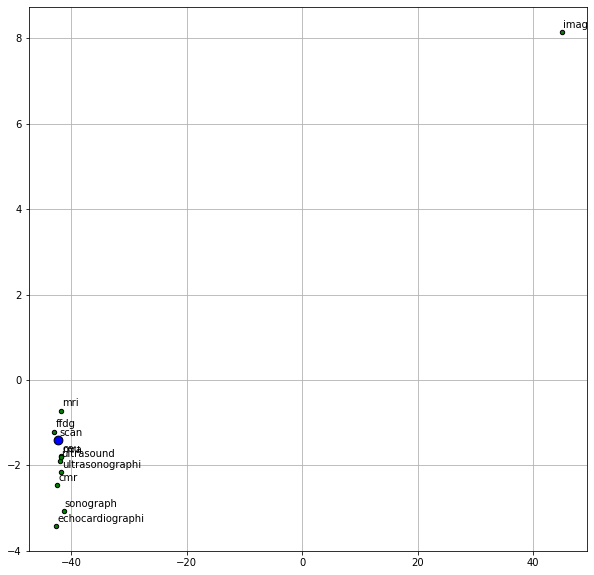


Sample Word:  tree
Similar Words with Euclidean distance: 
('phylogeni', 0.012004396444403858)
('matric', 0.015616210251733518)
('map', 0.01653191361739579)
('construct', 0.016540153598845305)
('infer', 0.01710962715998523)
('descriptor', 0.0171178960893887)
('bin', 0.017299108885978964)
('centroid', 0.017369626205833707)
('kmer', 0.017422667470199417)
('reconstruct', 0.017526288474070204)


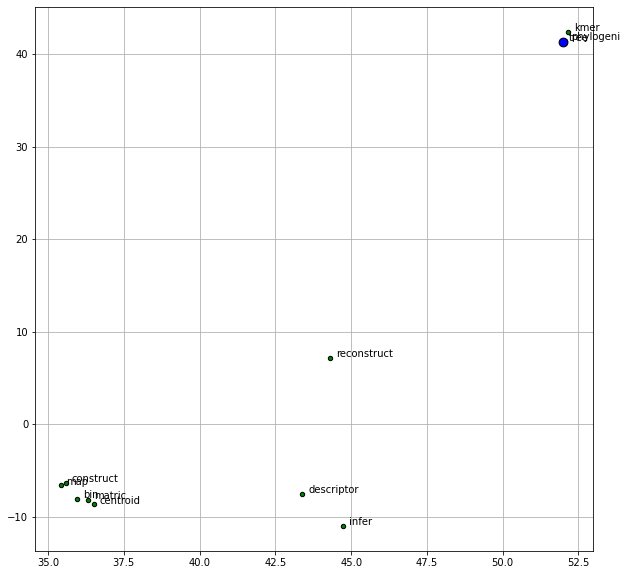


Sample Word:  bed
Similar Words with Euclidean distance: 
('referr', 0.017116917222672952)
('ward', 0.017130112865415912)
('inpati', 0.017313796032656346)
('overflow', 0.01907844133574297)
('ambul', 0.02017670386499371)
('hospit', 0.020600856763635055)
('stay', 0.021342096141339906)
('neurosurgeri', 0.021629226181874652)
('nicu', 0.02211772277810877)
('theater', 0.0221529921912905)


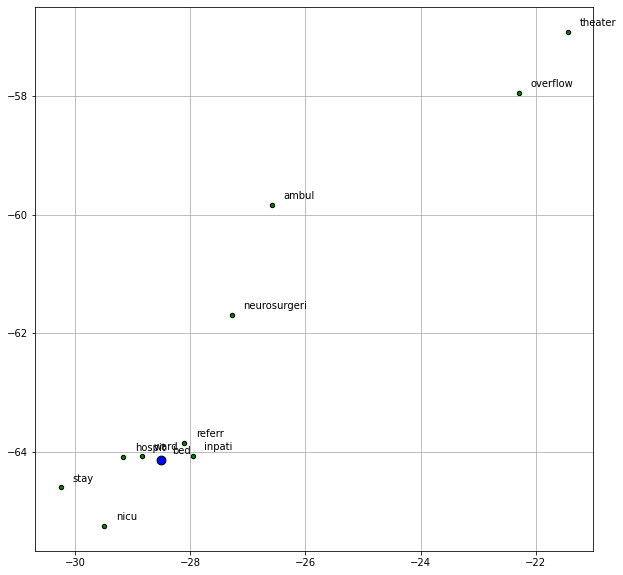


Sample Word:  graph
Similar Words with Euclidean distance: 
('represent', 0.010959802015650747)
('subgraph', 0.01168294428051692)
('path', 0.012767200671429878)
('partit', 0.012768205063052094)
('configur', 0.012791926057625467)
('subspac', 0.013237220116330857)
('sketch', 0.01376357949393016)
('edg', 0.013934576529502885)
('semant', 0.013984869234828378)
('architectur', 0.01406405516724743)


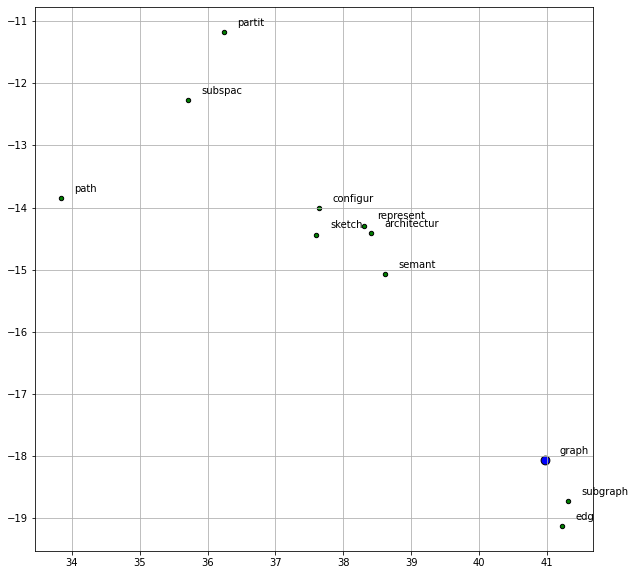

In [ ]:
## Showing similar words and the plots for each of the 4 nouns
## (Scroll the output to see all 4 results)

for words in nouns:
    print("Sample Word: ",words)
    print("Similar Words with Euclidean distance: ")
    print(*list(similar_words(words).items())[:10],sep="\n")
    plot_similar_words(list(similar_words(words).keys())[:10] + [words])
    print()